# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The problem here is to understand what are important features that decides the price of used cars and stage our recommendations accordinglly 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_csv("data/vehicles.csv")

In [3]:
raw_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
raw_df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
raw_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
raw_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Looking at the dataset we understand that VIN and ID will not be of help in predicting the price of the used car, hence I decided to drop VIN and ID columns from the dataset. 

In [8]:
df_new = raw_df.drop(columns = ["id","VIN"], axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [9]:
#To beging with data preparation, i begin by converting the data types of each feature to its best possible data type

#df_new = df_new.convert_dtypes()

In [10]:
#To obesrve data type changes in the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [11]:
#Now we can check the effects on the shape of dataset if I use dropna() on the entire data set
#we can obesrve a drastic change in number rows. 
#This mean we have lost a lot of other valueable information that could have help us to make better prediction
df_new.dropna().shape

(79195, 16)

In [12]:
#Now we will have few Int64 datatype so will check for colums where tuple value is zero

In [13]:
df_new.eq(0).sum()

region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

In [14]:
# Now the we price and odometer has plenty of entries as zero, hence we have to remove those rows as they will not be helpful for our model

df= df_new[(df_new.price != 0) & (df_new.odometer != 0)]

In [15]:
df.eq(0).sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [16]:
df.shape

(392871, 16)

In [17]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [18]:
df["region"].unique()

array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'bellingham', 'skagit / island / SJI',
       'la crosse', 'auburn', 'birmingham', 'dothan',
       'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara', 'santa mar

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [20]:
encoder = OrdinalEncoder()
imputer = IterativeImputer(LinearRegression())
# create a list of categorical columns to iterate over
cat_cols = df.columns

def encode(data):
    nonulls = np.array(data.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df[columns])

C:\Users\NISHKEE\AppData\Local\Temp\ipykernel_36640\2409681814.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
C:\Users\NISHKEE\AppData\Local\Temp\ipykernel_36640\2409681814.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
C:\Users\NISHKEE\AppData\Local\Temp\ipykernel_36640\2409681814.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [21]:
df.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
426875,397.0,8641,109.0,31.0,18788.0,2.0,5.0,2.0,16060.0,0.0,2.0,1.0,NaN,9.0,NaN,50.0
426876,397.0,10722,110.0,41.0,22455.0,2.0,NaN,2.0,4927.0,0.0,2.0,1.0,NaN,9.0,8.0,50.0
426877,397.0,11815,110.0,6.0,27803.0,2.0,NaN,0.0,1684.0,0.0,2.0,NaN,NaN,4.0,10.0,50.0
426878,397.0,10325,108.0,23.0,12829.0,2.0,5.0,2.0,14763.0,0.0,2.0,1.0,NaN,9.0,9.0,50.0
426879,397.0,10722,109.0,4.0,2939.0,2.0,NaN,2.0,10453.0,0.0,2.0,2.0,NaN,3.0,NaN,50.0


In [22]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [23]:
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392871 entries, 0 to 392870
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        392871 non-null  float64
 1   price         392871 non-null  float64
 2   year          392871 non-null  float64
 3   manufacturer  392871 non-null  float64
 4   model         392871 non-null  float64
 5   condition     392871 non-null  float64
 6   cylinders     392871 non-null  float64
 7   fuel          392871 non-null  float64
 8   odometer      392871 non-null  float64
 9   title_status  392871 non-null  float64
 10  transmission  392871 non-null  float64
 11  drive         392871 non-null  float64
 12  size          392871 non-null  float64
 13  type          392871 non-null  float64
 14  paint_color   392871 non-null  float64
 15  state         392871 non-null  float64
dtypes: float64(16)
memory usage: 48.0 MB


In [24]:
encode_data.tail(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
392861,397.0,8451.0,110.0,17.0,24212.0,2.0,5.0,2.0,1251.0,0.0,2.0,1.0,1.0,9.0,1.0,50.0
392862,397.0,6567.0,108.0,21.0,24491.0,2.0,4.0,2.0,17253.0,0.0,2.0,1.0,1.0,0.0,5.0,50.0
392863,397.0,11198.0,110.0,26.0,8922.0,2.0,5.0,2.0,8391.0,0.0,2.0,2.0,1.0,9.0,10.0,50.0
392864,397.0,10842.0,108.0,26.0,16208.0,2.0,5.0,2.0,6379.0,0.0,0.0,2.0,1.0,7.0,10.0,50.0
392865,397.0,11432.0,108.0,23.0,16610.0,2.0,5.0,2.0,15200.0,0.0,0.0,2.0,1.0,9.0,10.0,50.0
392866,397.0,8641.0,109.0,31.0,18788.0,2.0,5.0,2.0,16060.0,0.0,2.0,1.0,1.0,9.0,6.0,50.0
392867,397.0,10722.0,110.0,41.0,22455.0,2.0,4.0,2.0,4927.0,0.0,2.0,1.0,1.0,9.0,8.0,50.0
392868,397.0,11815.0,110.0,6.0,27803.0,2.0,5.0,0.0,1684.0,0.0,2.0,1.0,1.0,4.0,10.0,50.0
392869,397.0,10325.0,108.0,23.0,12829.0,2.0,5.0,2.0,14763.0,0.0,2.0,1.0,1.0,9.0,9.0,50.0
392870,397.0,10722.0,109.0,4.0,2939.0,2.0,5.0,2.0,10453.0,0.0,2.0,2.0,1.0,3.0,6.0,50.0


In [25]:
sns.pairplot(encode_data)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = encode_data.drop('price', axis=1)
y = encode_data.price

<AxesSubplot:ylabel='Frequency'>

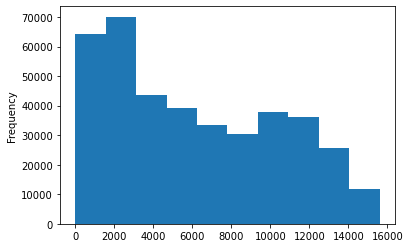

In [28]:
y.plot(kind='hist')


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [50]:
X.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [47]:
pipe_linear = Pipeline([
    ("scaler",StandardScaler()),
    ("linreg", LinearRegression())
])

In [48]:
pipe_linear.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [53]:
pipe_linear.named_steps["linreg"].coef_

array([  -43.21246064,  1054.79587782,   175.05205616,   -86.7116169 ,
          -5.1368532 ,  1776.51283697,  -485.42461559, -2177.3427673 ,
        -258.77026816,   290.03848188,  -517.14775469,   -19.53303398,
         136.16562755,   117.8016605 ,   -60.28570851])

In [54]:
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":pipe_linear.named_steps["linreg"].coef_})

,Feature,Coefficients
0,region,-43.212461
1,year,1054.795878
2,manufacturer,175.052056
3,model,-86.711617
4,condition,-5.136853
5,cylinders,1776.512837
6,fuel,-485.424616
7,odometer,-2177.342767
8,title_status,-258.770268
9,transmission,290.038482


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

According to my analysis should focus on following attributes in the respectivly:
1. cylinder
2. year
3. transmission
4. manufacturer
5. type
6. paint_color